# Vectorisation 1-gram et 2-gram TF-IDF avec CountVectorizer et classification avec MultinomialNB

In [1]:
import os
import pandas as pd

path = "data/text_classification/"

# dataset dict with emtpy attribute train
dataset = pd.DataFrame()

for file in os.listdir(path):
    if file.endswith(".csv"):
        new_data = pd.read_csv(path + file, sep=";")
        dataset = pd.concat([dataset, new_data], ignore_index=True)

dataset

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,Comment puis-je rejoindre Persan à partir de S...,1,0,0,0
1,Je prévois un voyage de VILLEFRANCHE-DE-CONFLE...,1,0,0,0
2,Go from the city of Sarlat La Caneda to Souillac.,0,1,0,0
3,What is the best way to go from Allamps-Esat t...,0,1,0,0
4,zg xqmajyjpfxsvvgycgqd c e i y ehgbcf f e o...,0,0,0,1
...,...,...,...,...,...
1528934,Tom met Mary in the lobby of the building.,0,1,1,0
1528935,Trouve un moyen d'atteindre BÉNING-LÈS-SAINT-A...,1,0,0,0
1528936,"]r.0j>&{TFQpZ(E\]""[$+mFhI/1*'vfL-X0G_x1MY&fn2+...",0,0,0,1
1528937,How long had you been sick before you saw the ...,0,1,1,0


In [2]:
labels = [label for label in dataset.columns if label not in ['text']]
id2label = {i:label for i, label in enumerate(labels)}
label2id = {v:k for k,v in id2label.items()}

print(labels)

['CORRECT', 'NOT_FRENCH', 'NOT_TRIP', 'UNKNOWN']


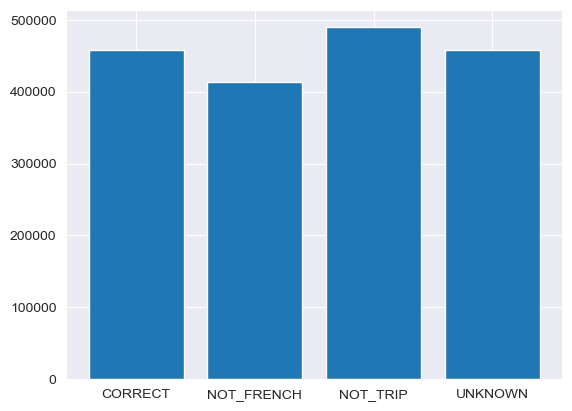

In [3]:
import matplotlib.pyplot as plt

plt.bar(labels, [sum(dataset[label]) for label in labels])
plt.show()

# Split du dataset en train, test et validation

In [4]:
from sklearn.model_selection import train_test_split

# Shuffle train dataset, and pick 50% of it
dataset = dataset.sample(frac=0.5, random_state=0)
X_train = dataset['text']
y_train = dataset[labels]

# To check how vectorizer works without UNKNOWN words being isolated
X_train_without_unknown = dataset[dataset['UNKNOWN'] == 0]['text']
y_train_without_unknown = dataset[dataset['UNKNOWN'] == 0][labels]

# Split test dataset into 10% validation and 10% test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(611576,) (76447,) (76447,)
(611576, 4) (76447, 4) (76447, 4)


In [5]:
X_train.values

array(['Crée un itinéraire précis de NEUFCHÂTEAU à MONTREUX-VIEUX, pour rencontrer Fleurentine.',
       'Trouve-moi un moyen de transport de la gare de Chambourg-Chopin vers Paray-Le-Monial.',
       "+$<j{{2N!{Nk4{G1jaE$i.Z#ul8 gCj%DGkSFG#lbj<K;SBi$Pla%'d6sBItpLSFXOr><'A'O2Ge/r:euna[2A-CZOUb",
       ...,
       'Depart for the central square of auxerre from the central square of le croisic.',
       'Je souhaiterais aller à VERRIERE (LA ) depuis MANTES-LA-VILLE.',
       'We knew that we were going to go in different directions when our school finished.'],
      dtype=object)

# Exemple d'utilisation de TfidfVectorizer

In [6]:
ngram_range = (1, 2)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(ngram_range=ngram_range)

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<611576x3819180 sparse matrix of type '<class 'numpy.float64'>'
	with 12931739 stored elements in Compressed Sparse Row format>

La plupart des features extraites sont des mots issus de la classe UNKNOWN générés aléatoirement mais qui apparaissent très peu de fois 

In [8]:
v.get_feature_names_out()[100000:100050]

array(['3jud47kn3zknzju', '3jud47kn3zknzju pb', '3judue', '3judue yh',
       '3jur', '3jur 8v7hx', '3jutjl', '3jutjl jgj', '3juv', '3juv z5',
       '3jv', '3jv 22jra', '3jv 7ygz', '3jv ckqb0gvn', '3jv dx1pgntmooje',
       '3jv js', '3jv m2kjz', '3jv rtao', '3jv undg', '3jvbsppz',
       '3jvbsppz tsw5x2', '3jvd29', '3jvd29 ql9s', '3jveuv',
       '3jveuv otr5', '3jvi', '3jvi kw', '3jvjvv1wwduve',
       '3jvjvv1wwduve 2gv', '3jvlzy4', '3jvlzy4 9l', '3jvq', '3jvq ss',
       '3jvtau', '3jvtau bmlo', '3jvy', '3jvy bs', '3jw', '3jw 5tus8',
       '3jw kz4', '3jw rsd48u', '3jw yuw30h', '3jw5ao', '3jw5ao zwbs2eq',
       '3jw_', '3jw_ ksj', '3jwgs', '3jwgs qp', '3jwru',
       '3jwru bek8u86ocuf'], dtype=object)

In [9]:
# Number of identified features
v.get_feature_names_out().shape

(3819180,)

In [10]:
v = TfidfVectorizer(ngram_range=ngram_range)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<535268x502767 sparse matrix of type '<class 'numpy.float64'>'
	with 10535448 stored elements in Compressed Sparse Row format>

In [11]:
# Number of identified features
v.get_feature_names_out().shape

(502767,)

In [12]:
v.get_feature_names_out()[30000:30050]

array(['artística es', 'artística la', 'artística qué', 'arujan', 'arush',
       'arush qui', 'arush souillac', 'arush verriere', 'arushan',
       'arushan neuilly', 'arvin', 'arvin le', 'arvind', 'arvind la',
       'arvind qui', 'arwenn', 'arwenn la', 'arwin', 'arwin qui',
       'arwin situé', 'ary', 'ary qui', 'arya', 'arya béning', 'arya qui',
       'arya situé', 'aryam', 'aryam qui', 'aryan', 'aryan dravidian',
       'aryan qui', 'aryana', 'aryana la', 'aryana qui', 'aryana situé',
       'aryeh', 'aryeh qui', 'aryem', 'aryem hopital', 'aryem la',
       'aryles', 'arys', 'arys oderen', 'arzhela', 'arzhela qui',
       'arzhelenn', 'arzhur', 'arzhur saint', 'arznei', 'arznei kaufen'],
      dtype=object)

In [13]:
# Add threshold to observe only words that appear at least 100 times
v = TfidfVectorizer(ngram_range=ngram_range, min_df=100)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<535268x6405 sparse matrix of type '<class 'numpy.float64'>'
	with 9088112 stored elements in Compressed Sparse Row format>

In [14]:
# Number of identified features
v.get_feature_names_out().shape

(6405,)

In [15]:
v.get_feature_names_out()[::50]

array(['11', 'aime', 'aller chez', 'ancenis depuis', 'arcs depuis',
       'at la', 'aux', 'bad', 'bateau', 'berthelming en', 'blanc en',
       'breisgau biel', 'budange to', 'calonne en', 'castelsarrasin',
       'ch lpa', 'charrière en', 'chez jean', 'claudel la',
       'commençons depuis', 'court entre', 'dan', 'de arches',
       'de bonneville', 'de cernay', 'de coutances', 'de firminy',
       'de jarny', 'de lourdes', 'de millau', 'de neuilly',
       'de pontorson', 'de sables', 'de toulon', 'de villiers',
       'denis saverne', 'depuis corbenay', 'depuis migennes',
       'depuis serquigny', 'dice', 'dit', 'dourdan', 'désire aller',
       'en direction', 'erstein depuis', 'etienne to', 'feuilée',
       'forest', 'from bourg', 'from isle', 'from neussargues',
       'from trier', 'gare de', 'girl', 'gueret depuis', 'has been',
       'herbitzheim', 'ich möchte', 'indique moi', 'it be', 'jetzt',
       'knew that', 'la souterraine', 'late', 'le locle', 'les laumes',
       

# Utilisation d'un pipeline SKLearn (vectorizer TfidfVectorizer + classifier MultinomialNB avec OneVsRestClassifier pour la classification multi-label)

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=ngram_range)),
    ('classifier', OneVsRestClassifier(MultinomialNB()))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('classifier', OneVsRestClassifier(estimator=MultinomialNB()))])

# Evaluation du modèle, métriques

In [17]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     CORRECT       0.89      1.00      0.94     23011
  NOT_FRENCH       1.00      0.99      1.00     20690
    NOT_TRIP       1.00      0.84      0.91     24585
     UNKNOWN       1.00      0.98      0.99     22665

   micro avg       0.97      0.95      0.96     90951
   macro avg       0.97      0.95      0.96     90951
weighted avg       0.97      0.95      0.96     90951
 samples avg       0.94      0.94      0.94     90951



C:\Users\nathp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

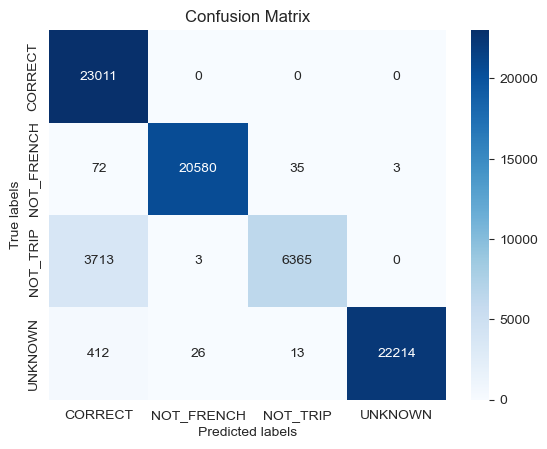

In [19]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

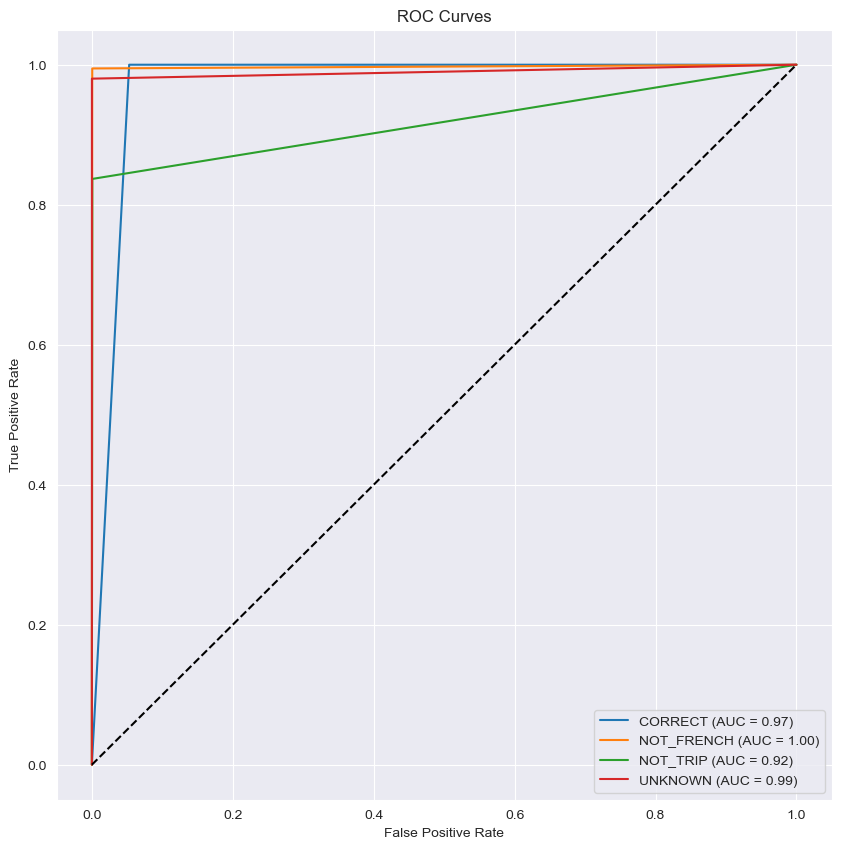

In [20]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(10, 10))

for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [21]:
texts = [
    "Je veux aller au cinéma",
    "Je veux aller du cinéma au restaurant",
    "I'd like to go from the cinema to the restaurant",
    "I'd like to Paris from Nanterre",
    "zaeazea eaz e:az e,az e\"zahoiplù;!:gf",
    "J'aimerais me rendre de Nanterre à Paris",
    "Je veux aller de Le Havre à Port-Boulet",
    "Nantes à Toulouse",
    "Dirige moi vers Lyon depuis Saint-Étienne.",
    "Trouve moi un itinéraire pour aller chez Emma de Paris à Marseille",
]

predicted_labels = pipeline.predict(texts)
predicted_proba = pipeline.predict_proba(texts)

# Displaying the predicted labels and probability scores for new texts
for text, p_labels, prob in zip(texts, predicted_labels, predicted_proba):
    print("*", text)
    for i, score in enumerate(prob):
        print(' -', id2label[i], '=>', f"{round(score * 100, 1)}%")
    print()

* Je veux aller au cinéma
 - CORRECT => 3.4%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 78.7%
 - UNKNOWN => 0.0%

* Je veux aller du cinéma au restaurant
 - CORRECT => 2.4%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 86.6%
 - UNKNOWN => 0.0%

* I'd like to go from the cinema to the restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 25.6%
 - UNKNOWN => 0.0%

* I'd like to Paris from Nanterre
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 1.6%
 - UNKNOWN => 0.0%

* zaeazea eaz e:az e,az e"zahoiplù;!:gf
 - CORRECT => 0.1%
 - NOT_FRENCH => 0.1%
 - NOT_TRIP => 0.2%
 - UNKNOWN => 99.6%

* J'aimerais me rendre de Nanterre à Paris
 - CORRECT => 99.6%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.2%
 - UNKNOWN => 0.0%

* Je veux aller de Le Havre à Port-Boulet
 - CORRECT => 62.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 20.6%
 - UNKNOWN => 0.0%

* Nantes à Toulouse
 - CORRECT => 53.7%
 - NOT_FRENCH => 7.6%
 - NOT_TRIP => 10.2%
 - UNKNOWN => 0.0%

* Dirige moi vers Lyon depuis Saint-Étienne

### Pour un même classifier, la vectorisation TF-IDF semble moins performante que la N-grams ou la BoW (voir matrice de confusion).